In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-1,1,200).reshape(-1,1)
y=2*x+1
N=x.shape[0]

In [12]:
def relu(z):
    return np.maximum(0,z)

def relu_derivative(z):
    return(z>0).astype(float)

def mse(y_true,y_pred):
    return np.mean((y_true - y_pred)**2)

In [13]:
def train_no_dropout(epochs=100, lr=0.05):
    W1 = np.random.randn(1, 10) * 0.1
    b1 = np.zeros((1, 10))
    W2 = np.random.randn(10, 1) * 0.1
    b2 = np.zeros((1, 1))

    losses = []

    for _ in range(epochs):
        # Forward
        z1 = x @ W1 + b1
        a1 = relu(z1)
        y_pred = a1 @ W2 + b2

        loss = np.mean((y_pred - y)**2)
        losses.append(loss)

        # Backward
        dL_dy = (2 / N) * (y_pred - y)
        dW2 = a1.T @ dL_dy
        db2 = np.sum(dL_dy, axis=0, keepdims=True)

        delta = dL_dy @ W2.T * relu_derivative(z1)
        dW1 = x.T @ delta
        db1 = np.sum(delta, axis=0, keepdims=True)

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return losses

In [14]:
def train_with_dropout(epochs=100, lr=0.05, dropout_rate=0.5):
    W1 = np.random.randn(1, 10) * 0.1
    b1 = np.zeros((1, 10))
    '''
    Biases are commonly initialized to zero.
    During backpropagation, the bias gradient is computed just like weights.
    Each update step adjusts the bias slightly.
    For the function y = 2x + 1, the correct bias is 1, so training pushes it toward that value over time.
    '''
    W2 = np.random.randn(10, 1) * 0.1
    b2 = np.zeros((1, 1))

    losses = []

    for _ in range(epochs):
        # Forward
        z1 = x @ W1 + b1
        a1 = relu(z1)

        #  DROPOUT APPLIED HERE
        mask = (np.random.rand(*a1.shape) > dropout_rate)
        a1 = a1 * mask / (1 - dropout_rate)

        y_pred = a1 @ W2 + b2

        loss = np.mean((y_pred - y)**2)
        losses.append(loss)

        # Backward
        dL_dy = (2 / N) * (y_pred - y)
        dW2 = a1.T @ dL_dy
        db2 = np.sum(dL_dy, axis=0, keepdims=True)

        delta = dL_dy @ W2.T * relu_derivative(z1)
        delta = delta * mask   # same neurons dropped

        dW1 = x.T @ delta
        db1 = np.sum(delta, axis=0, keepdims=True)

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return losses

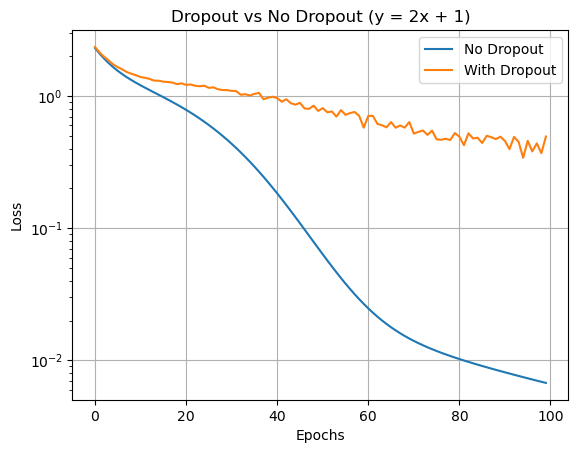

In [15]:
loss_no = train_no_dropout()
loss_do = train_with_dropout()

plt.plot(loss_no, label="No Dropout")
plt.plot(loss_do, label="With Dropout")
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Dropout vs No Dropout (y = 2x + 1)")
plt.legend()
plt.grid()
plt.show()
